<a href="https://colab.research.google.com/github/Kid-ML/MNIST/blob/master/MNIST_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


In [0]:
x_train = x_train.reshape(-1, 784)
x_train = x_train.astype('float32')
x_train /= 255.

y_train = y_train.astype('float32')

In [0]:
model = tf.keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(784,))) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(10)) 
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(x_train, y_train, batch_size=38, epochs=12, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 3s 61us/sample - loss: 0.3192 - acc: 0.9074 - val_loss: 0.1681 - val_acc: 0.9511
Epoch 2/12
48000/48000 [==============================] - 3s 57us/sample - loss: 0.1422 - acc: 0.9572 - val_loss: 0.1283 - val_acc: 0.9618
Epoch 3/12
48000/48000 [==============================] - 3s 58us/sample - loss: 0.1006 - acc: 0.9696 - val_loss: 0.1102 - val_acc: 0.9655
Epoch 4/12
48000/48000 [==============================] - 3s 56us/sample - loss: 0.0780 - acc: 0.9771 - val_loss: 0.0957 - val_acc: 0.9724
Epoch 5/12
48000/48000 [==============================] - 3s 58us/sample - loss: 0.0621 - acc: 0.9805 - val_loss: 0.1058 - val_acc: 0.9686
Epoch 6/12
48000/48000 [==============================] - 3s 57us/sample - loss: 0.0522 - acc: 0.9833 - val_loss: 0.1053 - val_acc: 0.9694
Epoch 7/12
48000/48000 [==============================] - 3s 57us/sample - loss: 0.0429 - acc: 0.9860 - val_loss: 0.

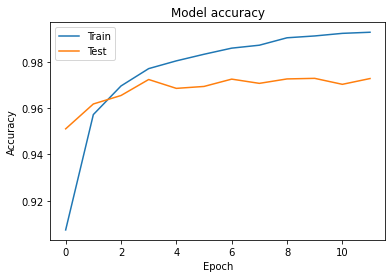

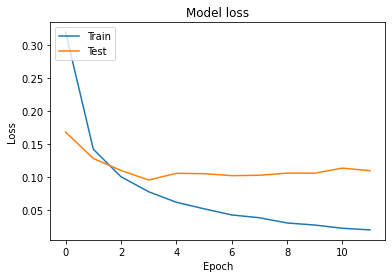

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()